## Esto es un cuaderno de Python ("iPython notebook" o "Jupyter notebook")

Esta divido en "cells" o celdas donde podemos escribir código.

Hay dos tipos de celdas. Celdas de codigo y celdas de texto

In [4]:
# esta es una celda de texto. vamos a imprimir algo. 
print('Hola mundo')

Hola mundo


## Vamos a guardar dos listas de numeros en una "variable": 

In [10]:
x_data = [1,3,5,7,9,11,13,15]

y_data = [15,13,11,9,7,5,3,1]

## Podemos importar librerias con herramientas (funciones) que vamos a usar:

In [11]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Mi primera figura con Python')

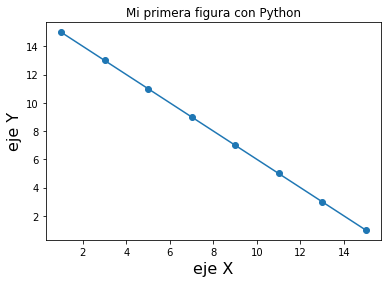

In [22]:
plt.plot(x_data, y_data, '-o')
plt.xlabel('eje X', fontsize = 16)
plt.ylabel('eje Y', fontsize = 16)
plt.title('Mi primera figura con Python')

## Una libreria que vamos a usar para analisis de datos se llama Pandas (Python Data Analysis Library)

In [23]:
import pandas as pd

Con pandas podemos leer "bases de datos" - e.g. hojas de excel o archivos formato .csv (comma separated values) con chorros de datos.


Como estamos trabajando en las computadoras de Google en la "nube", vamos a importar nuestros datos de unos "github repositories" (no te preocupes si no entiendes esta parte, solo estamos jalando unos datos para poder leerlos)

In [48]:
!wget https://raw.githubusercontent.com/beangoben/workshop_template/master/colab_utils.py -O colab_utils.py
!rm -rf sample_data
import colab_utils

--2021-01-19 19:04:46--  https://raw.githubusercontent.com/beangoben/workshop_template/master/colab_utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7173 (7.0K) [text/plain]
Saving to: ‘colab_utils.py’

colab_utils.py      100%[===================>]   7.00K  --.-KB/s    in 0s      

2021-01-19 19:04:46 (22.2 MB/s) - ‘colab_utils.py’ saved [7173/7173]



In [56]:
github_repo = 'https://github.com/ajinich/tcj_2021_data'
colab_utils.clone_repo(github_repo)

CMD: git clone --recursive https://github.com/ajinich/tcj_2021_data


In [51]:
colab_utils.conda_install_from_yaml()

Conda installing ['rdkit']
 from channels ['rdkit', 'conda-forge']
CMD: wget -c https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.3-Linux-x86_64.sh
CMD: chmod +x Miniconda3-py37_4.8.3-Linux-x86_64.sh
CMD: bash ./Miniconda3-py37_4.8.3-Linux-x86_64.sh -b -f -p /usr/local
PREFIX=/usr/local
Unpacking payload ...
Solving environment: ...working... done
## Package Plan ##
environment location: /usr/local
added / updated specs:
- _libgcc_mutex==0.1=main
- ca-certificates==2020.1.1=0
- certifi==2020.4.5.1=py37_0
- cffi==1.14.0=py37he30daa8_1
- chardet==3.0.4=py37_1003
- conda-package-handling==1.6.1=py37h7b6447c_0
- conda==4.8.3=py37_0
- cryptography==2.9.2=py37h1ba5d50_0
- idna==2.9=py_1
- ld_impl_linux-64==2.33.1=h53a641e_7
- libedit==3.1.20181209=hc058e9b_0
- libffi==3.3=he6710b0_1
- libgcc-ng==9.1.0=hdf63c60_0
- libstdcxx-ng==9.1.0=hdf63c60_0
- ncurses==6.2=he6710b0_1
- openssl==1.1.1g=h7b6447c_0
- pip==20.0.2=py37_3
- pycosat==0.6.3=py37h7b6447c_0
- pycparser==2.20=py_0
- pyopenssl=

## Ahora aparece en el folder de archivos uno que se llama "tuberculosis-death-rates.csv", vamos a leerlos con Pandas


In [34]:
df_data = pd.read_csv('tuberculosis-death-rates.csv')

In [35]:
df_data.head()

,Entity,Code,Year,Rate
0,Afghanistan,AFG,1990,52.233775
1,Afghanistan,AFG,1991,50.921457
2,Afghanistan,AFG,1992,49.127851
3,Afghanistan,AFG,1993,48.917753
4,Afghanistan,AFG,1994,49.970905


Algo muy util es aprender a filtrar los datos. Por ejemplo, solo nos interesan los datos de Mexico y de Sudafrica: 

In [44]:
df_MX = df_data[df_data.Entity == 'Mexico']
df_SA = df_data[df_data.Entity == 'South Africa']
df_IN = df_data[df_data.Entity == 'India']

In [45]:
df_MX.head(5)

,Entity,Code,Year,Rate
3668,Mexico,MEX,1990,13.568954
3669,Mexico,MEX,1991,12.466743
3670,Mexico,MEX,1992,11.645780
3671,Mexico,MEX,1993,10.700633
3672,Mexico,MEX,1994,9.753710


Text(0, 0.5, 'TB death rate')

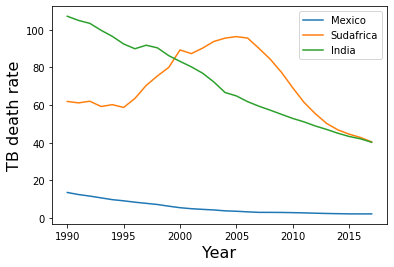

In [47]:
plt.plot(df_MX.Year, df_MX.Rate)
plt.plot(df_SA.Year, df_SA.Rate)
plt.plot(df_IN.Year, df_IN.Rate)

plt.legend(['Mexico', 'Sudafrica', 'India'])
plt.xlabel('Year', fontsize = 16)
plt.ylabel('TB death rate', fontsize = 16)

# Este es un taller de quimica (y microbiologia y programacion...) entonces vamos a usar Python para visualizar y analizar moleculas:  


In [70]:
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw

In [57]:
file_name = 'compounds.csv'
df_mols = pd.read_csv(file_name)
df_mols.head(5)

,compound_stem,SMILES,compound_name,pubchem_cid,kegg_kid,classifier_target,similar_to
0,K88043978,NCC[C@H](O)C(=O)N[C@@H]1C[C@H](N)[C@@H](O[C@H]...,amikacin,37768.0,D00865,30S ribosome 16S rRNA decoding,NaN
1,U78772829,C1[C@@H]([C@H]([C@@H]([C@H]([C@@H]1NC(=O)[C@H]...,amikacin hydrate,16218899.0,NaN,30S ribosome 16S rRNA decoding,NaN
2,A56169713,CNC(C)[C@@H]1CC[C@@H](N)[C@@H](OC2[C@@H](N)C[C...,gentamycin sulfate (gentacycol),53245641.0,NaN,30S ribosome 16S rRNA decoding,NaN
3,A24252652,CN[C@H]1C[C@@H](N)[C@H](O)[C@@H](O[C@@H]2O[C@H...,hygromycin b,56928061.0,NaN,30S ribosome 16S rRNA decoding,NaN
4,M53946149,CCN[C@@H]1C[C@H](N)[C@@H](O[C@H]2OC(CN)=CC[C@H...,netilmicin sulfate,62115.0,NaN,30S ribosome 16S rRNA decoding,NaN


In [81]:
mols_smiles = df_mols.sample(9).SMILES.values


In [82]:
mols_rdkit = [Chem.MolFromSmiles(smi) for smi in mols_smiles]

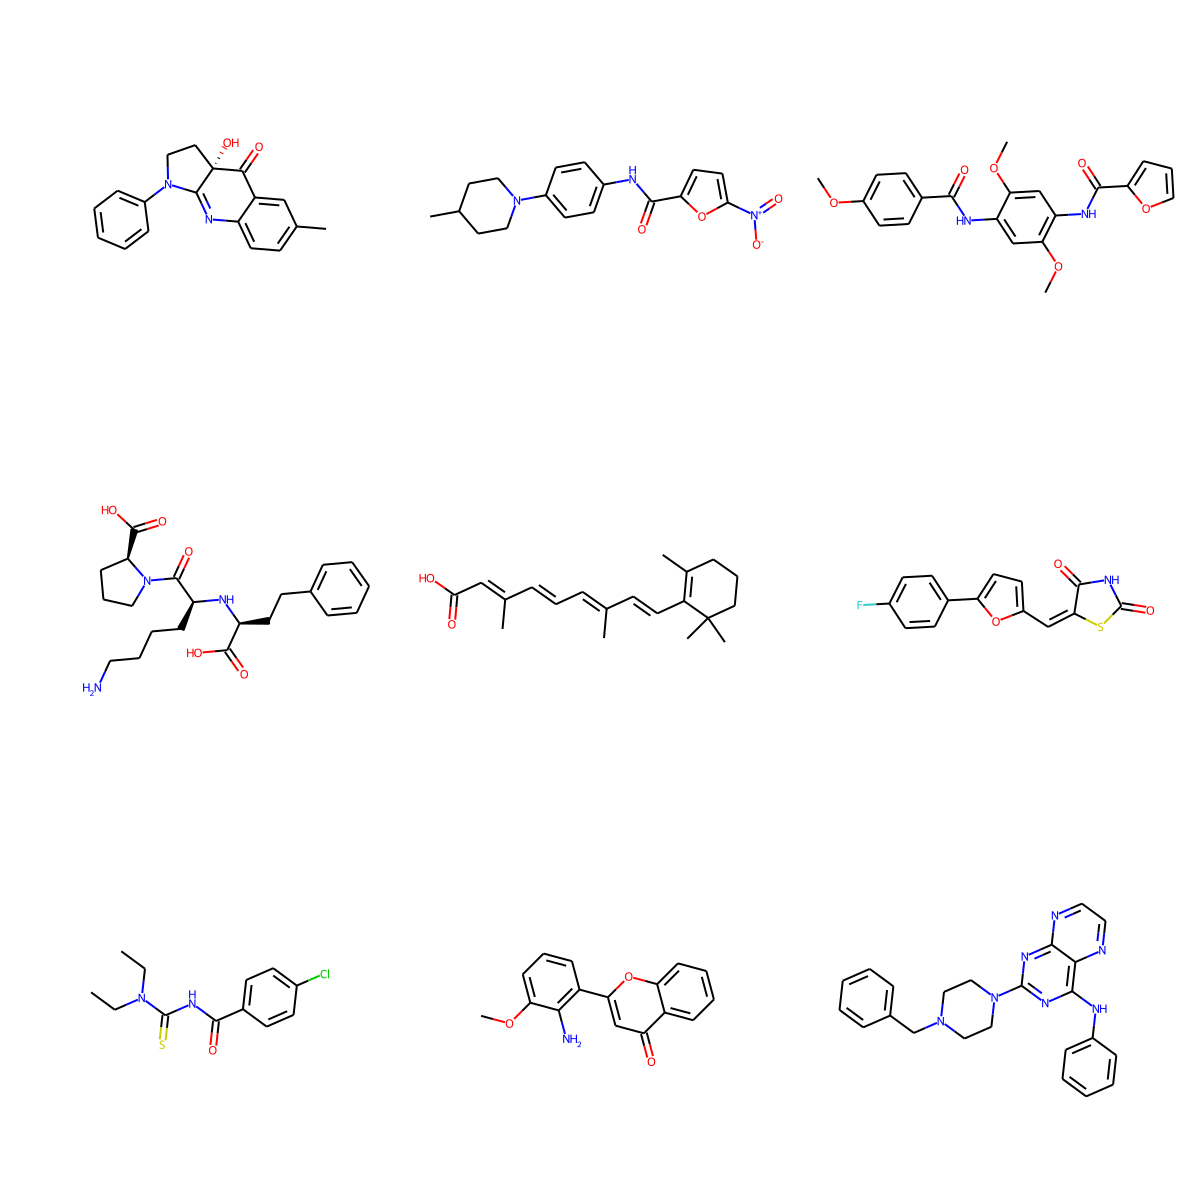

In [83]:
Draw.MolsToGridImage(mols_rdkit, subImgSize=(400, 400))